In [1]:
import pymongo
import pandas as pd
import datetime

Exception ignored in: <function Client.__del__ at 0x10e17ee50>
Traceback (most recent call last):
  File "/Users/nathanlindley/Library/Python/3.9/lib/python/site-packages/httpx/_client.py", line 1139, in __del__
    self.close()
  File "/Users/nathanlindley/Library/Python/3.9/lib/python/site-packages/httpx/_client.py", line 1111, in close
    self._transport.close()
AttributeError: 'Client' object has no attribute '_transport'


In [2]:
# Set up MongoDB client
client = pymongo.MongoClient('mongodb://localhost:27017/')
db_name = "posts"

db = client[db_name]
post = {"author": "Mike",
        "text": "My first blog post!",
        "tags": ["mongodb", "python", "pymongo"],
        "date": datetime.datetime.utcnow()
       }

posts = db.posts
post_id = posts.insert_one(post).inserted_id

print("Document ID: ", post_id)

Document ID:  639b6ea13d74349bbdf1112c


In [3]:
shows = pd.read_csv('data/Best Shows Netflix.csv', index_col=0)
show_yr = pd.read_csv('data/Best Show by Year Netflix.csv', index_col=0)
movies = pd.read_csv('data/Best Movies Netflix.csv', index_col=0)
movie_yr = pd.read_csv('data/Best Movie by Year Netflix.csv', index_col=0)
credits = pd.read_csv('data/raw_credits.csv', index_col=0)
titles = pd.read_csv('data/raw_titles.csv', index_col=0)

dfs = [shows, show_yr, movies, movie_yr, credits, titles]

In [26]:
for df in dfs:
    print(f'len(df): {len(df)}')
    print(f'df.columns: {df.columns}')

len(df): 246
df.columns: Index(['TITLE', 'RELEASE_YEAR', 'SCORE', 'NUMBER_OF_VOTES', 'DURATION',
       'NUMBER_OF_SEASONS', 'MAIN_GENRE', 'MAIN_PRODUCTION'],
      dtype='object')
len(df): 31
df.columns: Index(['TITLE', 'RELEASE_YEAR', 'SCORE', 'NUMBER_OF_SEASONS', 'MAIN_GENRE',
       'MAIN_PRODUCTION'],
      dtype='object')
len(df): 387
df.columns: Index(['TITLE', 'RELEASE_YEAR', 'SCORE', 'NUMBER_OF_VOTES', 'DURATION',
       'MAIN_GENRE', 'MAIN_PRODUCTION'],
      dtype='object')
len(df): 49
df.columns: Index(['TITLE', 'RELEASE_YEAR', 'SCORE', 'MAIN_GENRE', 'MAIN_PRODUCTION'], dtype='object')
len(df): 77213
df.columns: Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')
len(df): 5806
df.columns: Index(['id', 'title', 'type', 'release_year', 'age_certification', 'runtime',
       'genres', 'production_countries', 'seasons', 'imdb_id', 'imdb_score',
       'imdb_votes'],
      dtype='object')


In [32]:
credits.where(credits.role=='ACTOR').value_counts('name')

name
Shah Rukh Khan         30
Boman Irani            25
Kareena Kapoor Khan    25
Anupam Kher            25
Takahiro Sakurai       22
                       ..
Irene Tsu               1
Irene Wood              1
Irene Ziegler           1
Irene Zisblatt          1
조경이                     1
Length: 50723, dtype: int64

In [43]:
titles.where(titles.type == 'SHOW').value_counts('title').head(8)

title
Chosen          2
The Good Cop    2
Kakegurui       2
Top Boy         2
Cowboy Bebop    2
Danger Mouse    2
The Club        2
Sex/Life        1
dtype: int64

<AxesSubplot: >

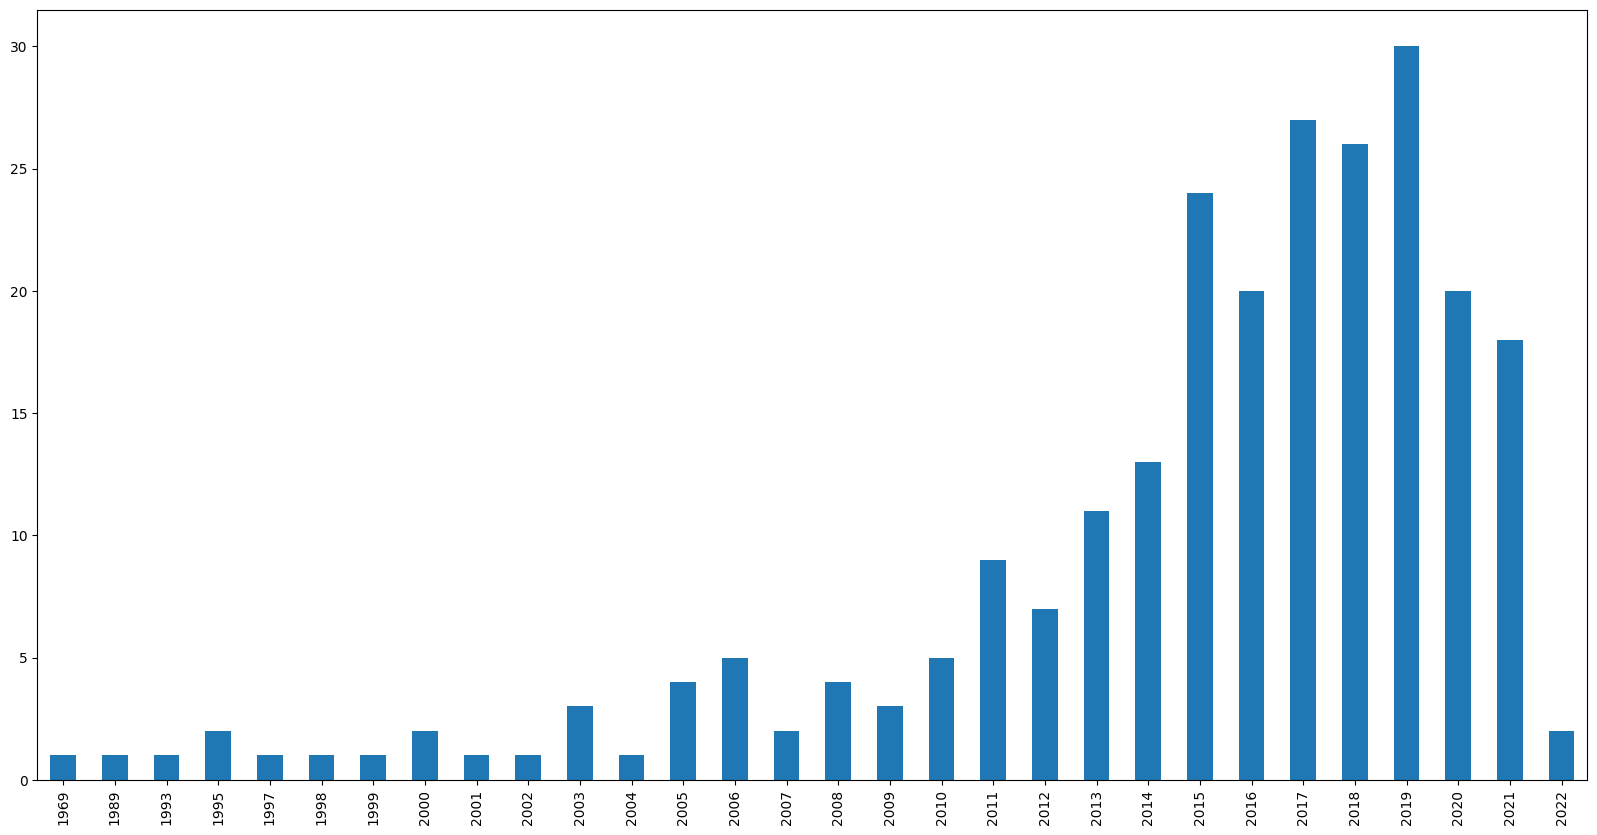

In [11]:
shows.RELEASE_YEAR.value_counts().sort_index().plot(kind='bar', figsize=(20,10))

<AxesSubplot: >

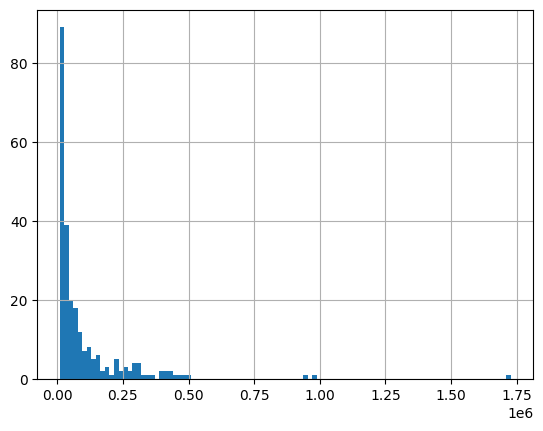

In [5]:
shows.NUMBER_OF_VOTES.hist(bins=100)

In [18]:
shows_recent = shows.where(shows.RELEASE_YEAR >= 2015).dropna()
shows_popular = shows_recent.where(shows_recent.NUMBER_OF_VOTES >= 10000).dropna()
shows_popular.where(shows_popular.RELEASE_YEAR == 2021).where(shows_popular.MAIN_PRODUCTION == 'US').sort_values(by='NUMBER_OF_VOTES', ascending=False).head(10)

,TITLE,RELEASE_YEAR,SCORE,NUMBER_OF_VOTES,DURATION,NUMBER_OF_SEASONS,MAIN_GENRE,MAIN_PRODUCTION
index,,,,,,,,
5,Arcane,2021.0,9.1,175412.0,41.0,1.0,action,US
182,Midnight Mass,2021.0,7.7,102321.0,64.0,1.0,action,US
201,Shadow and Bone,2021.0,7.6,77782.0,52.0,1.0,scifi,US
73,Maid,2021.0,8.4,74955.0,54.0,1.0,drama,US
163,Sweet Tooth,2021.0,7.8,49182.0,45.0,2.0,scifi,US
233,Night Stalker: The Hunt for a Serial Killer,2021.0,7.5,23939.0,47.0,1.0,crime,US
175,DOTA: Dragon's Blood,2021.0,7.8,17429.0,26.0,2.0,scifi,US
235,True Story,2021.0,7.5,16927.0,39.0,1.0,drama,US
195,Inside Job,2021.0,7.6,15137.0,28.0,1.0,comedy,US


In [19]:
s = '{"tag": "top5_movies_2020", "patterns": ["What are the top 5 movies of 2020", "Top 5 movies of 2020", "Top 5 movies from 2 years ago", "Top 5 movies from two years ago"], "responses": ["t5m2020"],"context_set": ""},{"tag": "top5_movies_2021","patterns": ["What are the top 5 movies of 2021", "Top 5 movies of 2021", "Top 5 movies from 1 year ago", "Top 5 movies from one year ago"],"responses": ["t5m2021"],"context_set": ""},{"tag": "top5_movies_2019","patterns": ["What are the top 5 movies of 2019", "Top 5 movies of 2019", "Top 5 movies from 3 years ago", "Top 5 movies from three years ago"],"responses": ["t5m2019"],"context_set": ""}'
import pprint

In [20]:
print(s.replace('movies', 'shows'))

{"tag": "top5_shows_2020", "patterns": ["What are the top 5 shows of 2020", "Top 5 shows of 2020", "Top 5 shows from 2 years ago", "Top 5 shows from two years ago"], "responses": ["t5m2020"],"context_set": ""},{"tag": "top5_shows_2021","patterns": ["What are the top 5 shows of 2021", "Top 5 shows of 2021", "Top 5 shows from 1 year ago", "Top 5 shows from one year ago"],"responses": ["t5m2021"],"context_set": ""},{"tag": "top5_shows_2019","patterns": ["What are the top 5 shows of 2019", "Top 5 shows of 2019", "Top 5 shows from 3 years ago", "Top 5 shows from three years ago"],"responses": ["t5m2019"],"context_set": ""}
